<a href="https://colab.research.google.com/github/Niama-ES/Chess-Pieces-Recognition-CNN-/blob/master/Chess_Piece_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ♟️ Chess Piece Recognition — AI/ML Project  
### Using Deep Learning (CNN) to Classify Chess Pieces from Images

In this notebook, we will preprocess the dataset, convert images to grayscale, build a convolutional neural network (CNN), train it, and evaluate its accuracy in recognizing chess pieces.

**Authors:** ELMOUSSAOUI Noura & ES-SELYMY Niama  
**Date:** 2025


---
# 1. Data Setup

In this section, we prepare our environment by connecting Google Drive and defining the dataset path.



## 1.1 Connect Google Drive

To access our dataset stored in Google Drive, we first need to mount Drive into our Colab environment.  
This allows us to load images directly from the `Chess pieces.v2i` folder.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Set the Dataset Path

Now that Google Drive is mounted, we specify the path to our dataset inside Drive.  
This step ensures that our notebook can correctly locate the images we will use for training.


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Shared_Chess_Project/ChessPieces.v2i.folder"

print("Contents of dataset:")
print(os.listdir(dataset_path))


Contents of dataset:
['README.dataset.txt', 'README.roboflow.txt', 'train', 'test', 'valid']


## 1.3 About the Chess Dataset

In this project, we use a computer-vision dataset from *Roboflow Universe* containing labeled images of chess pieces.  
Each image shows a single chess icon with different colors, styles, and backgrounds.  
***This is a preview image provided to help visualize the appearance of the dataset :***

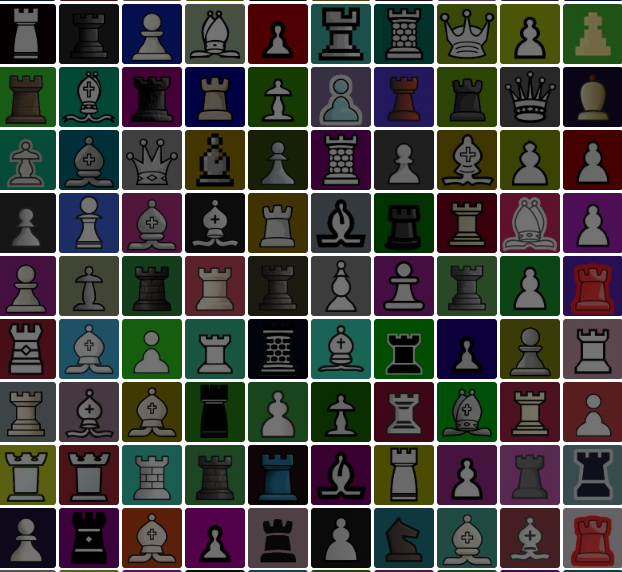

The dataset includes **12 categories**, representing both the white and black versions of the six chess pieces:

- **White:** Bishop, King, Knight, Pawn, Queen, Rook  
- **Black:** Bishop, King, Knight, Pawn, Queen, Rook

### *Image Properties*
- **Resolution:** 75 × 75 pixels (uniform for all images)  
- **Color format:** RGB  
- **Style:** Icon-based / symbolic chess pieces  
- **Content:** Single piece centered in each image  

Because all images already share the same size, our preprocessing will focus on:
- Converting images to **grayscale**  
- Normalizing pixel values  
- Preparing batches for training a Convolutional Neural Network (CNN)

### *Dataset Structure*
The dataset is organized into three subsets:

- **train/** – used to teach the model  
- **valid/** – used during training to tune the model and prevent overfitting  
- **test/** – used after training to evaluate final model performance  

The code below checks that the dataset has been successfully loaded from Google Drive.

In [ ]:
import os

# Display the top-level folders (train, valid, test)
print("Dataset contents:", os.listdir(dataset_path))

# Paths to the sub-folders
train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "valid")
test_dir  = os.path.join(dataset_path, "test")

print("\nTrain classes:", os.listdir(train_dir))
print("Valid classes:", os.listdir(valid_dir))
print("Test classes:", os.listdir(test_dir))


Dataset contents: ['README.dataset.txt', 'README.roboflow.txt', 'train', 'test', 'valid']

Train classes: ['wr', 'wq', 'wp', 'wb', 'wn', 'wk', 'br', 'bq', 'bp', 'bn', 'bb', 'bk']
Valid classes: ['wr', 'wp', 'wq', 'wn', 'wk', 'bq', 'br', 'wb', 'bk', 'bn', 'bp', 'bb']
Test classes: ['wr', 'wp', 'wk', 'wq', 'wb', 'wn', 'bp', 'bq', 'br', 'bn', 'bb', 'bk']


### *Explore the Dataset (Quick Check)*

Before preprocessing, we run a small exploration to make sure our dataset
is correctly loaded. We will simply check:

- Number of images in the training, validation, and test folders  
- Total number of images in the dataset  


In [ ]:
# Count number of images in train / valid / test folders

def count_images(folder_path):
    count = 0
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                count += 1
    return count

train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count  = count_images(test_dir)

print("Number of images in the dataset:")
print(f"  Training set   : {train_count}")
print(f"  Validation set : {valid_count}")
print(f"  Test set       : {test_count}")
print(f"\nTotal images     : {train_count + valid_count + test_count}")


Number of images in the dataset:
  Training set   : 13295
  Validation set : 1267
  Test set       : 634

Total images     : 15196


# 2. Data Preprocessing

In this section, we will load the images from the `train`, `valid`, and `test` folders and
prepare them for training a Convolutional Neural Network (CNN).

Our preprocessing steps will be:
- Load images from the directory structure using Keras utilities.
- Convert all images from RGB to **grayscale** (single channel).
- Resize images to a fixed size (75 × 75).
- Group images into batches for efficient training.

We will create three datasets:
- `train_ds`  – used to train the model  
- `val_ds`    – used to tune the model and monitor validation accuracy  
- `test_ds`   – used only at the end to evaluate final performance


## 2.1 Loading the Image Datasets

In [ ]:

import tensorflow as tf

# Image size from dataset
img_height, img_width = 75, 75
batch_size = 32

print("Train folder :", train_dir)
print("Valid folder :", valid_dir)
print("Test folder  :", test_dir)

# ---------------------------
# Load training dataset
# ---------------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",            # labels come from subfolder names
    label_mode="int",             # integer labels
    color_mode="grayscale",       # convert RGB → grayscale
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

# ---------------------------
# Load validation dataset
# ---------------------------
val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

# ---------------------------
# Load test dataset (no shuffle)
# ---------------------------
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)



Train folder : /content/drive/MyDrive/Shared_Chess_Project/ChessPieces.v2i.folder/train
Valid folder : /content/drive/MyDrive/Shared_Chess_Project/ChessPieces.v2i.folder/valid
Test folder  : /content/drive/MyDrive/Shared_Chess_Project/ChessPieces.v2i.folder/test
Found 13295 files belonging to 12 classes.
Found 1267 files belonging to 12 classes.
Found 634 files belonging to 12 classes.


## 2.2 Class Labels and Performance Optimizations

In [ ]:
# ============================================================
# Class names (folder labels)
# ============================================================

class_names = train_ds.class_names
print("Class names (short codes):", class_names)

# ============================================================
# Human-readable label mapping (added HERE)
# ============================================================

label_map = {
    "wp": "White Pawn",
    "wr": "White Rook",
    "wn": "White Knight",
    "wb": "White Bishop",
    "wq": "White Queen",
    "wk": "White King",
    "bp": "Black Pawn",
    "br": "Black Rook",
    "bn": "Black Knight",
    "bb": "Black Bishop",
    "bq": "Black Queen",
    "bk": "Black King",
}

print("\nHuman-readable labels:")
for code in class_names:
    print(f"{code} -> {label_map[code]}")

# ============================================================
# Performance optimizations
# ============================================================

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\nPreprocessing pipeline ready!")


Class names (short codes): ['bb', 'bk', 'bn', 'bp', 'bq', 'br', 'wb', 'wk', 'wn', 'wp', 'wq', 'wr']

Human-readable labels:
bb -> Black Bishop
bk -> Black King
bn -> Black Knight
bp -> Black Pawn
bq -> Black Queen
br -> Black Rook
wb -> White Bishop
wk -> White King
wn -> White Knight
wp -> White Pawn
wq -> White Queen
wr -> White Rook

Preprocessing pipeline ready!


### *Visualize some preprocessed grayscale images*

To verify that our preprocessing is correct, we display a small batch of images from
the training set in grayscale along with their labels.

Batch image tensor shape: (32, 75, 75, 1)
Batch label tensor shape: (32,)


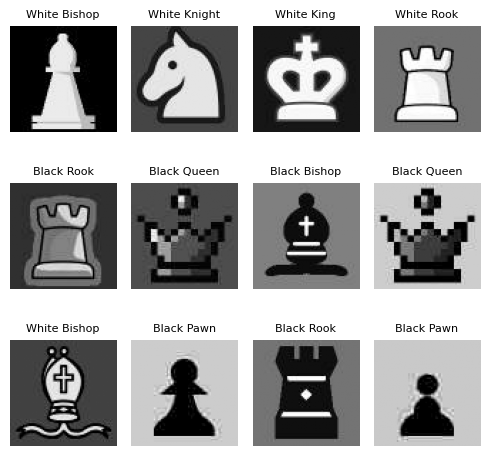

In [ ]:
# Display (afficher) the loaded and preprocessed data

import matplotlib.pyplot as plt
import tensorflow as tf

# Take one batch from the preprocessed training dataset
for batch_images, batch_labels in train_ds.take(1):

    print("Batch image tensor shape:", batch_images.shape)
    print("Batch label tensor shape:", batch_labels.shape)

    plt.figure(figsize=(5, 5))

    # Show 12 preprocessed grayscale images
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)

        # Remove last dimension (from (75, 75, 1) → (75, 75))
        img = tf.squeeze(batch_images[i], axis=-1)

        # Convert integer label → class code → human-readable name
        class_code = class_names[batch_labels[i]]
        readable_label = label_map[class_code]

        plt.imshow(img, cmap="gray")
        plt.title(readable_label, fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

    break

#3. Build the Convolutional Neural Network (CNN)

Now that our images are loaded, converted to grayscale, resized, and batched,
we can build a Convolutional Neural Network (CNN) to classify the chess pieces.

The model will:

- Take a 75 × 75 grayscale image as input  
- Normalize pixel values to the range [0, 1] using a `Rescaling` layer  
- Extract visual features using several convolution + max-pooling layers  
- Flatten the features and pass them through dense layers  
- Output a probability distribution over the 12 chess piece classes


## 3.1 Define the CNN architecture

In [ ]:
import tensorflow as tf

num_classes = len(class_names)
print("Number of classes:", num_classes)

model = tf.keras.Sequential([
    # Normalize pixel values from [0, 255] -> [0, 1]
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),

    # Convolution + MaxPooling blocks
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten & Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Output layer: one neuron per class, with softmax
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()


Number of classes: 12


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 75, 75, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 75, 75, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,452 (5.42 MB)

 Trainable params: 1,421,452 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Compile the Model

To train the neural network, we need to choose:
- a **loss function** (how the model measures its error),
- an **optimizer** (how the model updates its weights),
- and metrics to monitor during training.

We will use:
- `sparse_categorical_crossentropy` as the loss (because labels are integer-encoded),
- `Adam` as the optimizer,
- and accuracy as the main evaluation metric.

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled and ready for training.")


Model compiled and ready for training.


# 4. Train the Model

Now that the CNN is defined and compiled, we can train it on the
preprocessed training dataset and monitor its performance on the
validation set.

We will train the model for a few epochs and keep track of:
- training loss and accuracy
- validation loss and accuracy

This will help us see whether the model is learning correctly or overfitting.


## 4.1 Train the CNN model

In [ ]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 317s 758ms/step - accuracy: 0.6851 - loss: 0.9316 - val_accuracy: 0.9795 - val_loss: 0.0693
Epoch 2/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 142s 341ms/step - accuracy: 0.9672 - loss: 0.1058 - val_accuracy: 0.9945 - val_loss: 0.0219
Epoch 3/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 142s 340ms/step - accuracy: 0.9817 - loss: 0.0540 - val_accuracy: 0.9984 - val_loss: 0.0055
Epoch 4/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 143s 344ms/step - accuracy: 0.9874 - loss: 0.0479 - val_accuracy: 0.9992 - val_loss: 0.0057
Epoch 5/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 139s 335ms/step - accuracy: 0.9933 - loss: 0.0242 - val_accuracy: 0.9984 - val_loss: 0.0042
Epoch 6/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 141s 338ms/step - accuracy: 0.9932 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 7/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 139s 335ms/step - accuracy: 0.9950 - loss: 0.0134 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 8/15
416/416 ━━━━━━━━━━━━━━━━━━━━ 143s 338ms/step - accuracy: 0.9946 -

## 4.2 Visualize Training and Validation Curves

To better understand how the model behaves during training, we plot
the accuracy and loss for both the training and validation sets.
This helps us see if the model is overfitting or underfitting.

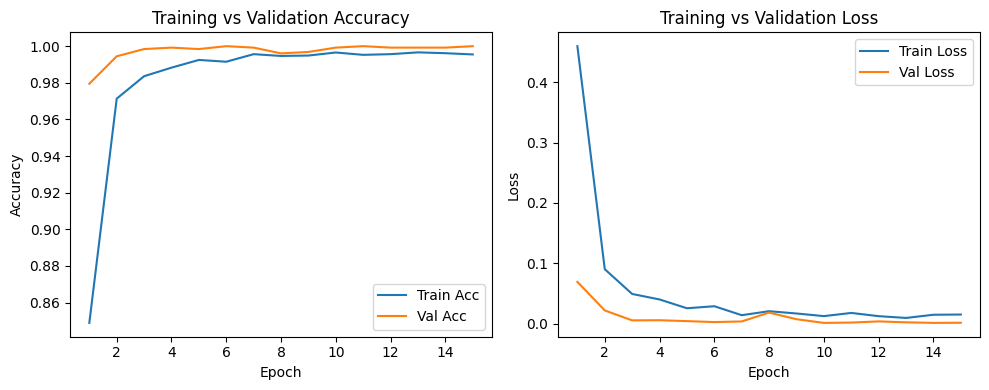

In [ ]:
import matplotlib.pyplot as plt

acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss    = history.history['loss']
val_loss= history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc')
plt.plot(epochs_range, val_acc, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 5. Evaluate the Model on the Test Set

We now evaluate the trained CNN on the test dataset, which contains images
the model has never seen during training or validation.

This gives us an unbiased estimate of the model’s performance.

In [ ]:
# 5.1 Evaluate model on test data

test_loss, test_acc = model.evaluate(test_ds)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9934 - loss: 0.0386

Test Accuracy: 0.9952681660652161
Test Loss: 0.02388259582221508


# 6. Make Predictions

With the trained model, we can now make predictions on test images.
We will display:

- the test image
- the model’s predicted label and confidence
- the true label
- a bar chart showing the probability for each of the 12 classes


## 6.1 – Get one batch & compute predictions

In [ ]:
# Build a per-image shuffled test dataset just for visualization
test_vis_ds = test_ds.unbatch().shuffle(1000, seed=123).batch(32)

# Take one random mixed batch
for test_images_batch, test_labels_batch in test_vis_ds.take(1):
    test_images_batch = test_images_batch.numpy()
    test_labels_batch = test_labels_batch.numpy()
    break

print("Batch shape:", test_images_batch.shape, test_labels_batch.shape)

# Get predictions for this batch
predictions = model.predict(test_images_batch)
print("Predictions shape:", predictions.shape)


Batch shape: (32, 75, 75, 1) (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predictions shape: (32, 12)


## 6.2 – Helper functions (image + bar chart)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_image(i, predictions_array, true_labels, images):
    true_label = true_labels[i]
    img = images[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img_2d = np.squeeze(img, axis=-1)  # (75,75,1) -> (75,75)
    plt.imshow(img_2d, cmap='gray')

    pred_vector = predictions_array[i]
    predicted_label = np.argmax(pred_vector)

    pred_code = class_names[predicted_label]
    true_code = class_names[true_label]

    pred_name = label_map[pred_code]
    true_name = label_map[true_code]

    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            pred_name,
            100 * np.max(pred_vector),
            true_name
        ),
        color=color,
        fontsize=8
    )


def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]

    plt.grid(False)
    plt.yticks([])

    pred_vector = predictions_array[i]

    # x-axis: class indices 0..11 (straight, like Fashion-MNIST)
    x_positions = range(len(class_names))
    thisplot = plt.bar(x_positions, pred_vector, color="#777777")
    plt.ylim([0, 1])
    plt.xticks(x_positions)   # straight numbers 0..11

    predicted_label = np.argmax(pred_vector)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


## 6.3 – Show one example (image + bar chart)

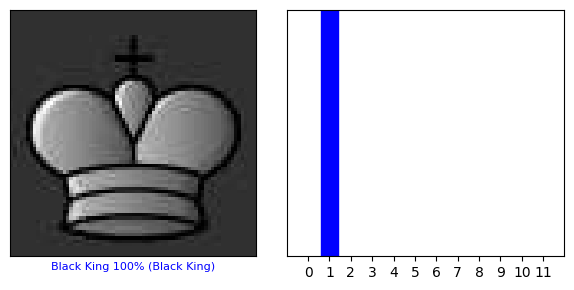

In [ ]:
i = 0  # index in the batch

plt.figure(figsize=(6, 3))  # similar to Fashion-MNIST
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels_batch, test_images_batch)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels_batch)
plt.tight_layout()
plt.show()


## 6.4 – Show several images like in the tutorial

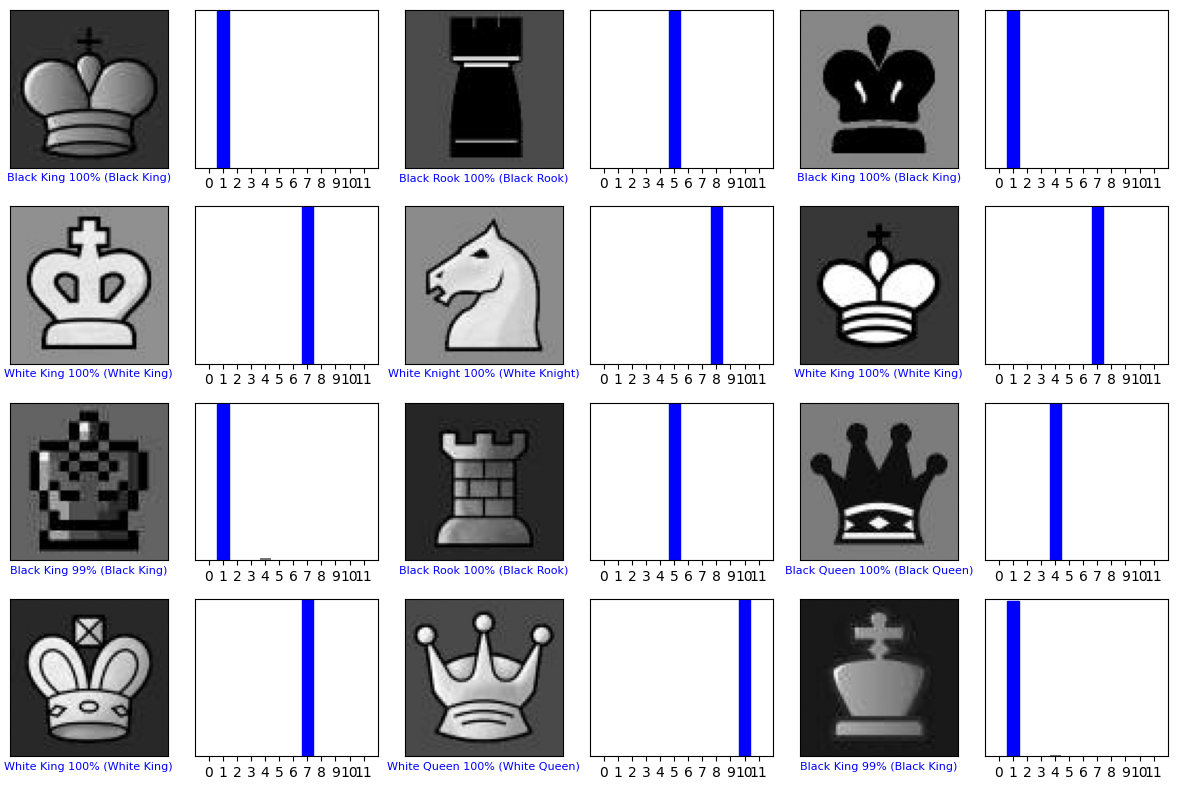

In [ ]:
num_rows = 4
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))  # like Fashion-MNIST

for i in range(num_images):
    # Image
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels_batch, test_images_batch)

    # Probability bars
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels_batch)

plt.tight_layout()
plt.show()


# 7. Use the Trained Model on a Single Image

Finally, we use the trained CNN to make a prediction for a single test image.

Keras models expect a **batch** as input, so even for a single image we
wrap it into a batch of size 1 before calling `model.predict`. Then we
display the image together with the model's predicted class and its
confidence scores over all 12 chess piece classes.


Single image shape (before batch): (75, 75, 1)
Single image batch shape: (1, 75, 75, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: Black Bishop
True label: Black Bishop


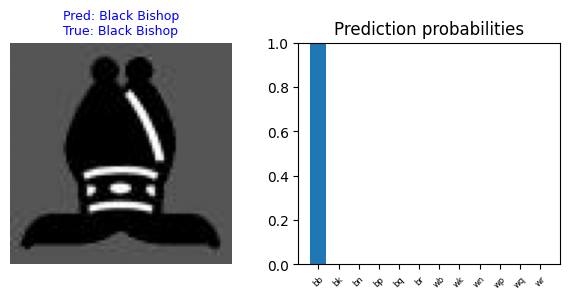

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#  Grab a single image and label from the test dataset
for test_images, test_labels in test_ds.take(1):
    single_img = test_images[0].numpy()   # shape (75, 75, 1)
    single_label = test_labels[0].numpy() # integer label
    break

print("Single image shape (before batch):", single_img.shape)

#  Add a batch dimension -> shape becomes (1, 75, 75, 1)
single_img_batch = np.expand_dims(single_img, axis=0)
print("Single image batch shape:", single_img_batch.shape)

#  Predict on this single image
predictions_single = model.predict(single_img_batch)
pred_vector = predictions_single[0]           # shape (12,)
pred_idx = np.argmax(pred_vector)

true_idx = single_label

pred_code = class_names[pred_idx]
true_code = class_names[true_idx]

pred_name = label_map[pred_code]
true_name = label_map[true_code]

print("Predicted:", pred_name)
print("True label:", true_name)

# Visualize the image + probability bar chart

plt.figure(figsize=(6, 3))

# Left: the image with predicted / true label
plt.subplot(1, 2, 1)
img_2d = np.squeeze(single_img, axis=-1)
plt.imshow(img_2d, cmap="gray")
color = "blue" if pred_idx == true_idx else "red"
plt.title(f"Pred: {pred_name}\nTrue: {true_name}", color=color, fontsize=9)
plt.axis("off")

# Right: probability distribution over all 12 classes
plt.subplot(1, 2, 2)
plt.bar(range(len(class_names)), pred_vector)
plt.xticks(range(len(class_names)), class_names, rotation=45, fontsize=6)
plt.ylim([0, 1])
plt.title("Prediction probabilities")

plt.tight_layout()
plt.show()


# 8. Confusion Matrix and Classification Report

To better understand which chess pieces are easiest or hardest for the model,
we compute a confusion matrix and a classification report.

- The **confusion matrix** shows, for each true class, how many images are
  predicted as each possible class.
- The **classification report** summarizes precision, recall, and F1-score
  for every chess piece class.


In [ ]:
import numpy as np

all_true = []
all_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds_idx = np.argmax(preds, axis=1)

    all_true.extend(labels.numpy())
    all_pred.extend(preds_idx)

all_true = np.array(all_true)
all_pred = np.array(all_pred)

print("Total test samples:", len(all_true))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Total test samples: 634


Code cell – confusion matrix + heatmap

Confusion matrix shape: (12, 12)


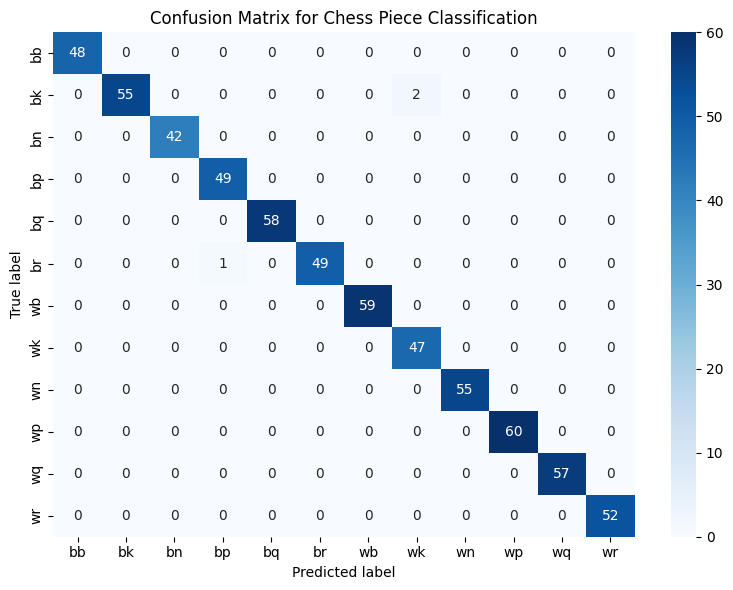

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns  # if not installed: pip install seaborn

cm = confusion_matrix(all_true, all_pred)
print("Confusion matrix shape:", cm.shape)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Chess Piece Classification")
plt.tight_layout()
plt.show()


Code cell – classification report

In [ ]:
report = classification_report(
    all_true,
    all_pred,
    target_names=[label_map[c] for c in class_names]
)
print(report)


              precision    recall  f1-score   support

Black Bishop       1.00      1.00      1.00        48
  Black King       1.00      0.96      0.98        57
Black Knight       1.00      1.00      1.00        42
  Black Pawn       0.98      1.00      0.99        49
 Black Queen       1.00      1.00      1.00        58
  Black Rook       1.00      0.98      0.99        50
White Bishop       1.00      1.00      1.00        59
  White King       0.96      1.00      0.98        47
White Knight       1.00      1.00      1.00        55
  White Pawn       1.00      1.00      1.00        60
 White Queen       1.00      1.00      1.00        57
  White Rook       1.00      1.00      1.00        52

    accuracy                           1.00       634
   macro avg       0.99      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634

